# Create media designs for DBTL 1 and DBTL 2

This notebook generates the initial media designs. We use ART's capability to provide initial designs for media components for which to get phenotypic data. These designs and phenotypic data will be used later to predict new designs. 

As this is the initial round of designs, we use Latin Hypercube sampling.


We include a desing that is very close to the standard media (up to 10% variation for each component), as a control for every cycle.

Tested using **ART 3.9.4** kernel on jprime.lbl.gov

## Inputs and output

**Required file to run this notebook:**
- `Putida_media_bounds.csv`
- `standard_recipe_concentrations.csv`

**File generated by running this notebook**
- `recommendations_initial.csv`

The files are stored in the user defined directory. 

## Setup

Clone the git repository with the `ART` library 

`git clone https://github.com/JBEI/AutomatedRecommendationTool.git`  
<!-- <font color='red'> _____ -->
<!-- **WE SHOULD TALK ABOUT LICENSING HERE!!!** </font> -->

or pull the latest version. 

Information about licensing ART is available at https://github.com/JBEI/ART.

Importing needed libraries:

In [1]:
import sys
sys.path.append('../../AutomatedRecommendationTool')        # Make sure this is the location for the ART library 
sys.path.append('../')
    
from art.core import * 
import matplotlib.pyplot as plt


## User parameters

### Defining media components and the number of instances (designs) to be created

In [2]:
CYCLE = 1

user_params = {
    'bounds_file': f'../data/flaviolin/Putida_media_bounds.csv',
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}', # Folder for output files,
    'standard_media_file': '../data/flaviolin/standard_recipe_concentrations.csv',
}

Specify which components to explore:

In [3]:
user_params['components'] = [
    'H3BO3',
    'K2SO4',
    'K2HPO4',
    'FeSO4',
    'NH4Cl',
    'MgCl2',
    'NaCl',
    '(NH4)6Mo7O24',
    'CoCl2',
    'CuSO4',
    'MnSO4',
    'ZnSO4'
]

Here we specify how many instances (designs) we want to create and how many replicates (change as desired). In this case we run two DBTL cycles with initial designs, 12 instances with 4 replicates for each, out of which one design is reserved for the control.

In [4]:
user_params['n_instances'] = 22
user_params['n_replicates'] = 4 

In [5]:
df_stand = pd.read_csv(user_params['standard_media_file']).set_index("Component")

In [6]:
df_stand

,Concentration[mM],Solubility[mM]
Component,,
MOPS,40.00000,2389.37
Tricine,4.00000,500.08
H3BO3,0.00400,700.00
Glucose,20.00000,5045.63
K2SO4,0.29000,636.98
K2HPO4,1.32000,8564.84
FeSO4,0.01000,1645.73
NH4Cl,9.52000,6543.28
MgCl2,0.52000,569.27


### Generate the control media 

Control media will be uniformly drawn from the interval 90% to 110% around the standard recipe.

In [8]:
ub = 1.1
lb = 0.9
df_control = pd.DataFrame(columns=user_params['components'])

for component in user_params['components']:
    stand_conc = df_stand.loc[component]['Concentration[mM]']
    df_control.at[0, component] = stand_conc*np.random.uniform(lb, ub)
    df_control.at[1, component] = stand_conc*np.random.uniform(lb, ub)


In [9]:
df_control

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
0,0.003797,0.31178,1.325974,0.009506,9.927665,0.568441,50.767801,0.00003,0.000296,0.000096,0.000729,0.000102
1,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095


### Random media

Read bounds:

In [9]:
df_bounds = pd.read_csv(user_params['bounds_file'])

In [13]:
df_bounds

,Variable,Min,Max
0,H3BO3,0.000400,0.0400
1,K2SO4,0.029000,2.9000
2,K2HPO4,0.264000,6.6000
3,FeSO4,0.001000,0.1000
4,NH4Cl,6.346667,14.2800
5,MgCl2,0.052000,5.2000
6,NaCl,5.000000,500.0000
7,(NH4)6Mo7O24,0.000003,0.0003
8,CoCl2,0.000030,0.0030
9,CuSO4,0.000010,0.0010


In [12]:
df_bounds_factor = pd.DataFrame(columns=['Variable', 'Min', 'Max'])
df_bounds_factor['Variable'] = user_params['components']
df_bounds_factor['Min'] = -1*np.ones(12)
df_bounds_factor['Max'] = np.ones(12)
df_bounds_factor

,Variable,Min,Max
0,H3BO3,-1.0,1.0
1,K2SO4,-1.0,1.0
2,K2HPO4,-1.0,1.0
3,FeSO4,-1.0,1.0
4,NH4Cl,-1.0,1.0
5,MgCl2,-1.0,1.0
6,NaCl,-1.0,1.0
7,(NH4)6Mo7O24,-1.0,1.0
8,CoCl2,-1.0,1.0
9,CuSO4,-1.0,1.0


Draw LH samples from [-1, 1]

If [0, 1] map it to [1, 10] or [1, 5] or [1, 1.5].

If [-1, 0] map it to [1/10, 1] or [1/5, 1] or [1/1.5, 1].

In [37]:
mapping = lambda x, factor: 1 + -1*((1/factor) -1)*x if x < 0 else 1 + (factor-1)*x


In [16]:
bounds_factor_file = f'../data/flaviolin/Putida_media_bounds_factor.csv'

In [15]:
df_bounds_factor.to_csv(bounds_factor_file)

Define a dictionary that contains the settings that ART will use to find the recommended designs:

In [17]:
art_params = {
    'input_vars': user_params['components'],
    'bounds_file': bounds_factor_file, # file with bounds# input variables, i.e. features
    'num_recommendations': user_params['n_instances'],    # one of them will be wild type
    'initial_cycle': True,                                    # Set this to True for initial designs recommendations
    'seed': 10,                                               # seed for number random generator
    'output_directory': user_params['output_file_path']  # directory to store this output
}


With the configuration stored in `art_params`, we now run ART:

In [18]:
art = RecommendationEngine(**art_params)
df = art.recommendations.copy()
df.tail()

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
17,0.461553,0.155350,0.983747,-0.450628,0.514157,-0.036522,0.564835,0.738410,-0.515389,-0.086488,-0.700367,-0.430708
18,-0.183902,0.854222,-0.762021,-0.670338,0.804056,-0.622623,-0.709187,-0.416590,0.908083,-0.896166,0.490311,-0.790845
19,-0.491148,-0.463379,0.653148,0.481257,0.934072,-0.763542,0.130873,-0.550522,0.709990,-0.274653,-0.219453,-0.506410
20,-0.908732,0.327187,-0.835216,-0.341629,0.051523,-0.167346,-0.825657,-0.649377,0.340951,-0.165554,0.638585,-0.148603
21,-0.425916,-0.651938,0.083839,0.799483,-0.220169,-0.512983,-0.538217,0.648201,-0.032266,0.394425,-0.875151,0.714257


Transform these bounds into our factors:

In [38]:
df_ranges_factors = df.copy()

factor = {}
for comp in (user_params['components']):
    factor[comp] = np.sqrt(
        df_bounds[df_bounds['Variable']==comp]['Max'] / df_bounds[df_bounds['Variable']==comp]['Min']
    )

for ind in df.index:
    for comp in df.columns:
        df_ranges_factors.at[ind, comp] = mapping(df.at[ind, comp], factor[comp])


In [39]:
df_ranges_factors.head()

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
0,0.936081,0.101698,3.026828,4.284701,0.681773,0.412487,3.958330,0.534083,0.845205,3.092333,7.963716,8.664749
1,2.296160,1.312064,0.876344,0.797074,1.220398,9.673588,1.012158,5.167360,0.508078,0.289756,0.512360,2.773878
2,8.609263,4.963588,4.561190,6.511586,0.812761,7.985757,0.662753,3.471862,6.699411,5.733073,6.617270,9.979392
3,7.769878,0.674805,1.799309,2.168732,1.163780,1.903780,8.002889,8.412768,3.245798,8.550822,1.459456,5.798210
4,6.223298,0.979750,1.417649,0.979104,0.983933,0.205699,0.458700,0.162225,1.468842,3.598580,0.494865,0.447840


Transform these factors into our ranges:

In [22]:
df_ranges = df.copy()

for comp in df.columns:
    stand_conc = df_stand.loc[comp, 'Concentration[mM]']
    df_ranges.loc[:, comp] = stand_conc * df_ranges_factors.loc[:, comp]

In [23]:
df_ranges

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
0,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866
1,0.009185,0.380499,1.156774,0.007971,11.618192,5.030266,50.607910,0.000155,0.000152,0.000029,0.000410,0.000277
2,0.034437,1.439441,6.020771,0.065116,7.737483,4.152594,33.137668,0.000104,0.002010,0.000573,0.005294,0.000998
3,0.031080,0.195694,2.375088,0.021687,11.079187,0.989965,400.144448,0.000252,0.000974,0.000855,0.001168,0.000580
4,0.024893,0.284127,1.871296,0.009791,9.367041,0.106963,22.935014,0.000005,0.000441,0.000360,0.000396,0.000045
5,0.016562,0.255908,1.062554,0.029932,12.336016,2.537792,42.024681,0.000007,0.000192,0.000041,0.007093,0.000486
6,0.001816,1.774687,0.324830,0.004349,7.800423,0.746968,441.470194,0.000021,0.002819,0.000928,0.001514,0.000387
7,0.002789,0.904382,0.795318,0.017571,8.526913,2.128669,38.005852,0.000059,0.000670,0.000165,0.000125,0.000247
8,0.012395,0.186466,3.323911,0.067838,8.331418,4.706578,497.484672,0.000199,0.000068,0.000011,0.000751,0.000018
9,0.004742,0.064880,4.598113,0.041488,10.513500,0.373878,232.319445,0.000138,0.001727,0.000063,0.007646,0.000024


## Cycle 1

In [24]:
df_target_1 = df_ranges.iloc[:11]
df_target_1 = df_target_1.append(df_control.iloc[0]).reset_index(drop=True)
df_target_1

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
0,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866
1,0.009185,0.380499,1.156774,0.007971,11.618192,5.030266,50.607910,0.000155,0.000152,0.000029,0.000410,0.000277
2,0.034437,1.439441,6.020771,0.065116,7.737483,4.152594,33.137668,0.000104,0.002010,0.000573,0.005294,0.000998
3,0.031080,0.195694,2.375088,0.021687,11.079187,0.989965,400.144448,0.000252,0.000974,0.000855,0.001168,0.000580
4,0.024893,0.284127,1.871296,0.009791,9.367041,0.106963,22.935014,0.000005,0.000441,0.000360,0.000396,0.000045
5,0.016562,0.255908,1.062554,0.029932,12.336016,2.537792,42.024681,0.000007,0.000192,0.000041,0.007093,0.000486
6,0.001816,1.774687,0.324830,0.004349,7.800423,0.746968,441.470194,0.000021,0.002819,0.000928,0.001514,0.000387
7,0.002789,0.904382,0.795318,0.017571,8.526913,2.128669,38.005852,0.000059,0.000670,0.000165,0.000125,0.000247
8,0.012395,0.186466,3.323911,0.067838,8.331418,4.706578,497.484672,0.000199,0.000068,0.000011,0.000751,0.000018
9,0.004742,0.064880,4.598113,0.041488,10.513500,0.373878,232.319445,0.000138,0.001727,0.000063,0.007646,0.000024


In [25]:
df_target_2 = df_ranges.iloc[11:]
df_target_2 = df_target_2.append(df_control.iloc[1]).reset_index(drop=True)
df_target_2

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
0,0.026992,0.229277,0.556502,0.002319,7.370092,1.386888,355.093844,0.000028,0.000101,0.000790,0.000560,0.000172
1,0.001199,2.356433,0.965094,0.005574,10.252992,0.428695,133.073471,0.000090,0.000246,0.000706,0.002361,0.000076
2,0.000652,1.962582,0.873249,0.008783,12.660508,0.339745,46.512992,0.000024,0.002356,0.000249,0.003064,0.000828
3,0.001419,1.525230,0.685683,0.003056,7.111266,2.989155,268.913280,0.000293,0.000203,0.000617,0.000727,0.000616
4,0.039355,2.811631,1.234260,0.087010,13.494543,3.346859,35.580086,0.000054,0.000034,0.000046,0.000217,0.000071
5,0.018675,0.086753,3.135703,0.001613,6.843367,0.061564,5.810257,0.000009,0.000112,0.000057,0.003480,0.000042
6,0.020616,0.695463,6.514184,0.005944,11.967387,0.502908,304.175814,0.000229,0.000161,0.000092,0.000296,0.000061
7,0.003338,2.519519,0.515306,0.003967,13.347308,0.228613,18.086604,0.000019,0.002752,0.000019,0.004330,0.000029
8,0.002232,0.169058,4.768621,0.053313,13.966184,0.162662,108.892942,0.000015,0.002217,0.000075,0.000642,0.000054
9,0.000729,1.143957,0.438012,0.006925,9.765248,0.441682,12.845440,0.000012,0.001221,0.000085,0.005398,0.000087


### Checking the distribution of initial designs

In [14]:
def designs_pairwise(art, df):

    dim = art.num_input_var

    plt.style.use(["seaborn-talk"])

    fig = plt.figure(figsize=(35, 35))
    fig.patch.set_facecolor("white")

    X = df.values

    for var1 in range(dim):
        for var2 in range(var1 + 1, dim):

            ax = fig.add_subplot(dim, dim, (var2 * dim + var1 + 1))
            ax.scatter(
                X[:, var1],
                X[:, var2],
                c="r",
                edgecolor="r",
                marker="+",
                lw=1,
                label="Train data",
            )
            
            if var2 == (dim - 1):
                ax.set_xlabel(art.input_vars[var1])
            if var1 == 0:
                ax.set_ylabel(art.input_vars[var2])
                if var2 == 0:
                    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), shadow=True)

    fig.savefig(f'{art.outDir}/designs_pairwise.png', transparent=False, dpi=300
    )

/tmp/ipykernel_74992/2920520357.py:16: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


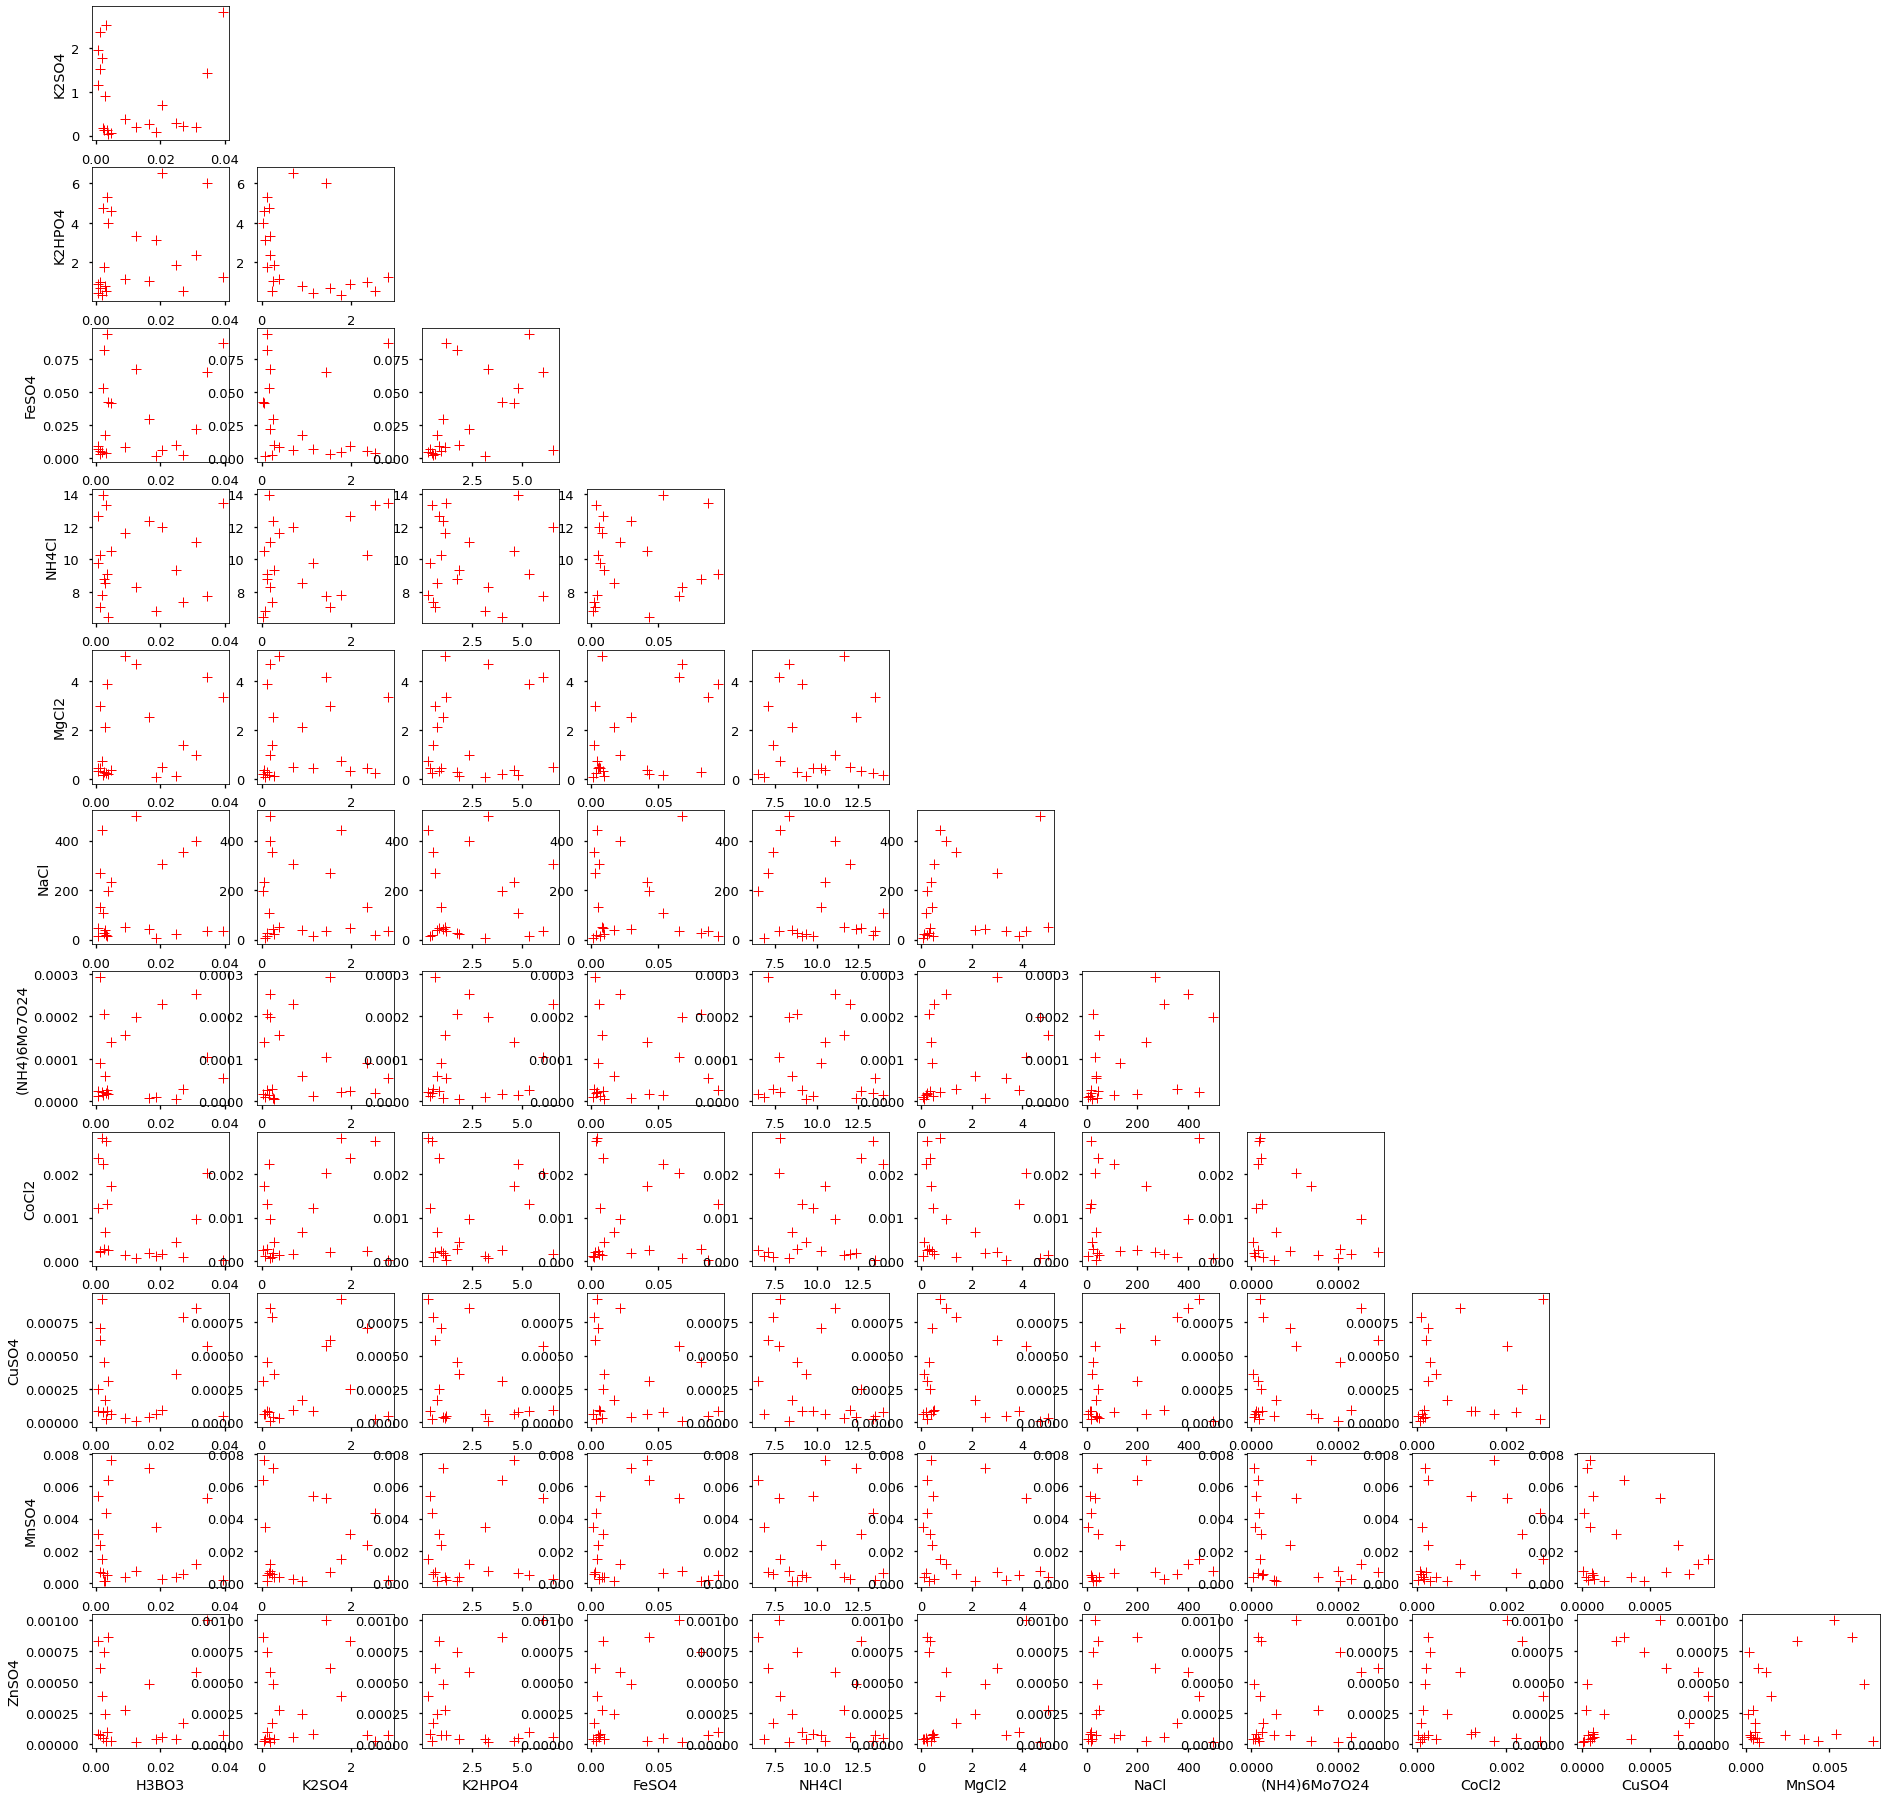

In [75]:
designs_pairwise(art, df_ranges)

## Saving the generated designs

Include all replicates: 

In [26]:
df_target_1 = df_target_1.loc[df_target_1.index.repeat(user_params['n_replicates'])]
df_target_2 = df_target_2.loc[df_target_2.index.repeat(user_params['n_replicates'])]


Rename index to well names:

In [27]:
well_rows = 'ABCDEF'
well_columns = '12345678'

In [28]:
well_names = [f'{row}{column}'  for row in well_rows for column in well_columns]

df_target_1['Well'] = well_names
df_target_1 = df_target_1.set_index(['Well'])
df_target_1

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
Well,,,,,,,,,,,,
A1,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866
A2,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866
A3,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866
A4,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866
A5,0.009185,0.380499,1.156774,0.007971,11.618192,5.030266,50.607910,0.000155,0.000152,0.000029,0.000410,0.000277
A6,0.009185,0.380499,1.156774,0.007971,11.618192,5.030266,50.607910,0.000155,0.000152,0.000029,0.000410,0.000277
A7,0.009185,0.380499,1.156774,0.007971,11.618192,5.030266,50.607910,0.000155,0.000152,0.000029,0.000410,0.000277
A8,0.009185,0.380499,1.156774,0.007971,11.618192,5.030266,50.607910,0.000155,0.000152,0.000029,0.000410,0.000277
B1,0.034437,1.439441,6.020771,0.065116,7.737483,4.152594,33.137668,0.000104,0.002010,0.000573,0.005294,0.000998


In [29]:
file = f"{user_params['output_file_path']}/target_concentrations.csv"
df_target_1.to_csv(file)

In [30]:
df_target_2['Well'] = well_names
df_target_2 = df_target_2.set_index(['Well'])

In [31]:
file = f'../data/flaviolin/DBTL2/target_concentrations.csv'
df_target_2.to_csv(file)